Chapter 09

# 满足高斯分布的随机数
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码生成了一组服从正态分布的数据，分析数据在不同标准差范围内的分布情况，并对其可视化。

1. **生成数据**：
   - 代码生成500个数据点，服从均值为$-2$，标准差为$3$的正态分布，记为 `data`，并计算其总体均值 $\mu_{data}$ 和标准差 $\sigma_{data}$。

2. **标准差范围的划分**：
   - 代码通过$\pm \sigma_{data}$和$\pm 2\sigma_{data}$这两种标准差范围，划分数据点是否落入指定范围内。具体划分如下：
     - 对于每个标准差因子（例如 $1\sigma$ 和 $2\sigma$），代码确定上界和下界为 $\mu_{data} + k\sigma_{data}$ 和 $\mu_{data} - k\sigma_{data}$，其中 $k$ 是标准差因子。
     - `inside_data`数组用于记录在此范围内的点，而`outside_data`用于记录落在此范围外的点。

3. **数据可视化**：
   - 代码创建两个子图。第一个子图显示数据点在给定范围内的散点分布，第二个子图展示数据的分布直方图。
     - **子图1**：在数据时间序列的图中，蓝色点表示范围内的数据，红色叉号表示超出范围的数据。加上水平线表示$\mu_{data}$、$\mu_{data} \pm \sigma_{data}$或$\mu_{data} \pm 2\sigma_{data}$。
     - **子图2**：通过 `seaborn` 库绘制数据分布的直方图，并标记数据的均值和标准差线，分别表示$\mu_{data}$、$\mu_{data} \pm \sigma_{data}$ 或 $\mu_{data} \pm 2\sigma_{data}$。

4. **统计落在标准差范围外的数据点**：
   - 打印落在指定标准差范围外的点数，用于观察数据在此范围之外的分布情况。

此分析方法可以用于评估正态分布数据在特定标准差区间内外的概率分布，并可视化出大部分数据的分布范围。

这段代码用于生成符合正态分布的数据并分析数据在不同标准差区间内的分布情况。代码分别计算了在均值 $\mu$ 上下 $1\sigma$ 和 $2\sigma$ 区间内的数据点，并在可视化中标出位于区间内和区间外的数据点，利用直方图和分布曲线展示数据分布的情况。

### 标准差区间
对于正态分布数据，在不同倍数的标准差 $\sigma$ 区间内的数据点分布如下：
- $1\sigma$ 区间：包含 $\mu \pm \sigma$ 范围内的数据点
- $2\sigma$ 区间：包含 $\mu \pm 2\sigma$ 范围内的数据点

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 准备数据

In [2]:
num_data  = 500  # 设置数据数量
data = np.random.normal(loc=-2, scale=3, size=(num_data,1))  # 生成符合正态分布的随机数据
loc_array = np.cumsum(np.ones_like(data))  # 位置数组

mu_data = data.mean()  # 计算数据的均值
sigma_data = data.std()  # 计算数据的标准差

## 依次绘制不同标准差区间的数据分布图

166
21


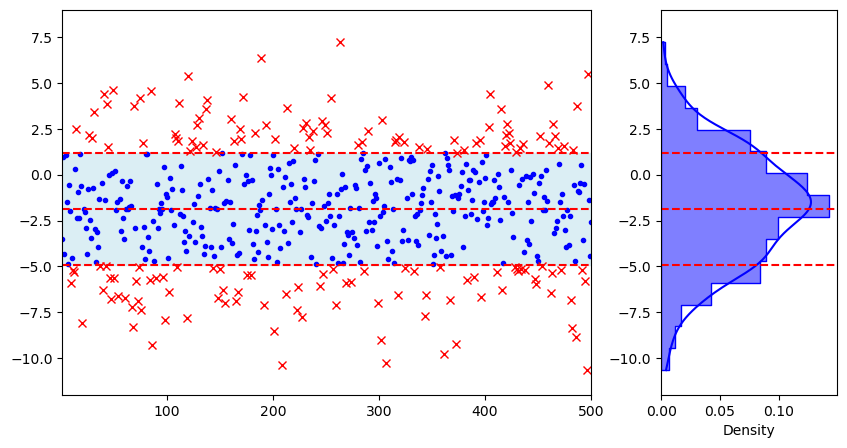

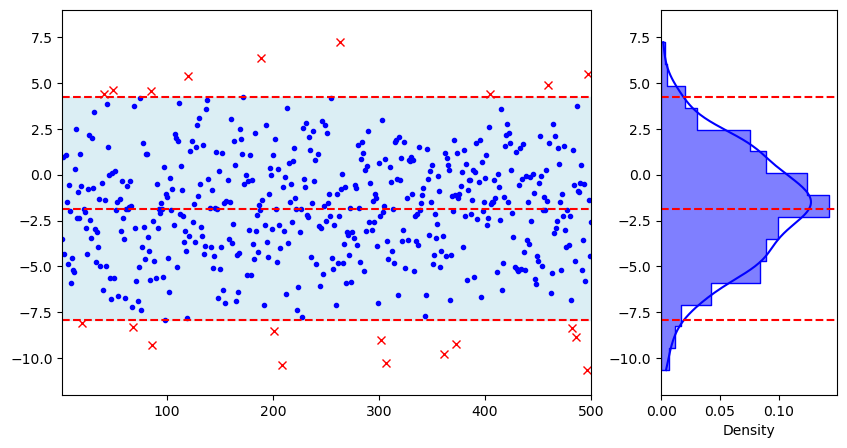

In [3]:
for sigma_band_factor in [1, 2]:  # 遍历 1σ 和 2σ 区间

    inside_data  = np.copy(data)  # 创建区间内数据副本
    outside_data = np.copy(data)  # 创建区间外数据副本
    
    plus_sigma   = mu_data + sigma_band_factor * sigma_data  # 计算上限
    minus_sigma  = mu_data - sigma_band_factor * sigma_data  # 计算下限

    outside_data[(outside_data >= minus_sigma) & (outside_data <= plus_sigma)] = np.nan  # 标记区间外数据
    inside_data[(inside_data >= plus_sigma) | (inside_data <= minus_sigma)] = np.nan  # 标记区间内数据

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [3, 1]})  # 创建子图布局
    
    ## 绘制数据区间图

    ax1.plot(loc_array, inside_data,  marker = '.', color = 'b', linestyle = 'None')  # 绘制区间内数据
    ax1.plot(loc_array, outside_data, marker = 'x', color = 'r', linestyle = 'None')  # 绘制区间外数据

    ax1.fill_between(loc_array, 0*loc_array + plus_sigma, 0*loc_array + minus_sigma, color = '#DBEEF4')  # 填充区间

    ax1.axhline(y = mu_data,     color = 'r', linestyle = '--')  # 绘制均值线
    ax1.axhline(y = plus_sigma,  color = 'r', linestyle = '--')  # 绘制上限线
    ax1.axhline(y = minus_sigma, color = 'r', linestyle = '--')  # 绘制下限线
    ax1.set_ylim([np.floor(data.min()) - 1, np.ceil(data.max()) + 1])  # 设置 Y 轴范围
    ax1.set_xlim([loc_array.min(), loc_array.max()])  # 设置 X 轴范围
    
    ## 使用 histplot 绘制垂直直方图和 KDE 曲线

    sns.histplot(y=data.ravel(), ax=ax2, bins=15, kde=True, color="b", element="step", stat="density")  # 绘制垂直直方图和 KDE 曲线
    ax2.set_ylim([np.floor(data.min()) - 1, np.ceil(data.max()) + 1])  # 设置 Y 轴范围
    ax2.axhline(y = mu_data,     color = 'r', linestyle = '--')  # 绘制均值线
    ax2.axhline(y = plus_sigma,  color = 'r', linestyle = '--')  # 绘制上限线
    ax2.axhline(y = minus_sigma, color = 'r', linestyle = '--')  # 绘制下限线

    print(np.count_nonzero(~np.isnan(outside_data)))  # 打印区间外数据点的数量